# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Will be using tensorflow's keras to create the model architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['test.csv', 'train.csv', 'sample_submission.csv']


# Load Data into Pandas DF

In [4]:
# Load in training data
train = pd.read_csv('input/train.csv', header = 0)
# Check the shape of the training data
print("Train shape: {0}".format(train.shape))
# Load in the test data
test = pd.read_csv('input/test.csv', header = 0)
# Check shape of test data
print("Test shape: {0}".format(test.shape))
# ^ Test shape should be one less than train shape due to no labels being present
test.astype('float32', inplace = True)

# Make sure data was stored in train df
print(train.head(3))
# Make sure data was stored in test df
print(test.head(3))

Train shape: (42000, 785)
Test shape: (28000, 784)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  

[3 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0 

# Split training data into X and y

In [5]:
# Load the features into train_X df
train_X = train.loc[:, train.columns != 'label']
train_X.astype('float32', inplace = True)

# Load labels into train_y
train_y = train['label']
train_y.astype('int32', inplace = True)

# Double check the labels are not in the df
train_X.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalize inputs

(42000, 28, 28, 1)


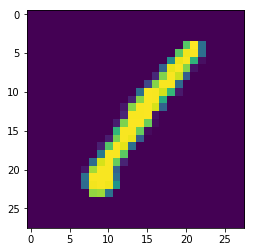

In [6]:
# 10 classes, digits 0-9
number_of_classes = 10

train_X = train_X.values / 255
test = test.values / 255

# Reshape data to (num_rows, 28, 28, 1)
w = 28
h = 28

# Reshape to visualize in matplot
train_X = train_X.reshape(train_X.shape[0], w, h)
# Take a look at the number visually
plt.imshow(train_X[0])

# Now reshape to fit model
train_X = train_X.reshape(train_X.shape[0], w, h, 1)
test = test.reshape(test.shape[0], w, h, 1)

# Now we one-hot encode the labels, categorical digits 0-9
train_y = tf.keras.utils.to_categorical(train_y, number_of_classes)

print(train_X.shape)

# Create model architecture

In [7]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', 
                        input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Fit the model

In [8]:
model.fit(train_X, train_y, batch_size=64, epochs=20, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
42000/42000 [==============================] - 5s 118us/sample - loss: 1.1028 - acc: 0.6381
Epoch 2/20
42000/42000 [==============================] - 5s 118us/sample - loss: 0.6665 - acc: 0.7958
Epoch 3/20
42000/42000 [==============================] - 5s 116us/sample - loss: 0.5687 - acc: 0.8256
Epoch 4/20
42000/42000 [==============================] - 5s 115us/sample - loss: 0.5117 - acc: 0.8444
Epoch 5/20
42000/42000 [==============================] - 5s 118us/sample - loss: 0.4826 - acc: 0.8518
Epoch 6/20
42000/42000 [==============================] - 5s 114us/sample - loss: 0.4552 - acc: 0.8592
Epoch 7/20
42000/42000 [==============================] - 5s 114us/sample - loss: 0.4394 - acc: 0.8666
Epoch 8/20
42000/42000 [==============================] - 5s 114us/sample - loss: 0.4187 - acc: 0.8720
Epoch 9/20
42000/42000 [==============================] - 5s 117us/sample - loss: 0.4093 - acc: 0.8746
Epoch 10/20
42000/42000 [

# Make predictions on test set

In [9]:
# Make the predictions
predictions = model.predict_classes(test, verbose=0)

os.mkdir('output')

# Turn predictions into a df to submit
competition_submission = pd.DataFrame({"ImageId": list(range(1, len(predictions) + 1)), "Label": predictions})
competition_submission.to_csv("output/digit_recognizer_predictions.csv", index=False, header=True)

# Make sure predictions were saved to csv
print(os.listdir("output"))

['digit_recognizer_predictions.csv']
